<h1>Anime Recommendation System</h1>

Hello! Welcome the the Anime Recommendation System!
Any time you see "#C.H." it means there is code hidden to improve readability. If you wish to view the code, please click on the cell and press the ^ button in the top toolbar.

In [1]:
print("#C.H.")
print("This cell contains required imports")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import ipywidgets as widgets
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#C.H.
This cell contains required imports


Use the buttons below to jump to a specific section:

<button>[Recommendation System](#recommendation_system)</button>
<button>[Management Dashboard](#management_dashboard)</button>

The next cell imports the anime data, which was found on Kaggle.com and collected by ... from ...

In [2]:
data = pd.read_csv('anime.csv')

Here are the first 3 rows of the data set:

In [3]:
data.head(3)

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,2009.0,2010.0,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702,86547.0
1,your name.,Movie,1.0,107.0,False,2016.0,2016.0,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663,43960.0
2,A Silent Voice,Movie,1.0,130.0,False,2016.0,2016.0,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892.0,946,17148,132,4.661,33752.0


In [4]:
print("#C.H.")
print('This creates the check boxes to use next')
Title_check = widgets.Checkbox(
        value = True,
        description = "Title",
        disabled=False
)
Media_Type_check = widgets.Checkbox(
        value = False,
        description = "Media Type",
        disabled=False
)
Episodes_check = widgets.Checkbox(
        value = False,
        description = "Episodes",
        disabled=False
)
Ongoing_check = widgets.Checkbox(
        value = False,
        description = "Ongoing",
        disabled=False
)
StartYr_check = widgets.Checkbox(
        value = False,
        description = "Start Year",
        disabled=False
)
EndYr_check = widgets.Checkbox(
        value = False,
        description = "End Year",
        disabled=False
)
ReleaseSzn_check = widgets.Checkbox(
        value = False,
        description = "Release Season",
        disabled=False
)
Description_check = widgets.Checkbox(
        value = False,
        description = "Description",
        disabled=False
)
Studio_check = widgets.Checkbox(
        value = False,
        description = "Studios",
        disabled=False
)
Tags_check = widgets.Checkbox(
        value = True,
        description = "Tags",
        disabled=False
)
Rating_check = widgets.Checkbox(
        value = False,
        description = "Rating",
        disabled=False
)
Votes_check = widgets.Checkbox(
        value = False,
        description = "Number of Votes",
        disabled=False
)
checkbox_list = [Title_check, Media_Type_check, Episodes_check, Ongoing_check, StartYr_check, EndYr_check, 
                 ReleaseSzn_check, Description_check, Studio_check, Tags_check, Rating_check, Votes_check]

#C.H.
This creates the check boxes to use next


<a id='recommendation_system'></a>
<h3>Recommendation System</h3>

In [5]:
print("#C.H.")
print("Choose what categories the recommendation will be based on:")

out = widgets.Output()
display(out)

row1 = [Title_check, Media_Type_check, Episodes_check, Ongoing_check]
row2 = [StartYr_check, EndYr_check, ReleaseSzn_check, Description_check]
row3 = [Studio_check, Tags_check, Rating_check, Votes_check]
button_row1 = widgets.HBox(row1)
button_row2 = widgets.HBox(row2)
button_row3 = widgets.HBox(row3)
    
display(button_row1, button_row2, button_row3)    
    
rec_parameters = []
default_parameters = [Tags_check, Studio_check, Rating_check]

def refresh_check_boxes(e):
    out.clear_output()
    for box in checkbox_list:
        box.value = False
    for box in default_parameters:
        box.value = True

def update_search_parameters(e):
    out.clear_output(wait=True)
    with out:
        rec_parameters = []
        for box in checkbox_list:
            if box.value:
                rec_parameters.append(box.description)
        if len(rec_parameters) < 2:
            print("Please select at least two tags")
        else: 
            out.clear_output()

apply_search_parameters_button = widgets.Button(
    description='Apply',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to apply recommendation settings',
    icon='' #'check'
)

refresh_check_button = widgets.Button(
    description='Reset to Defaults',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to reset filters to default settings',
    icon='' #'check'
)

apply_search_parameters_button.on_click(update_search_parameters)
refresh_check_button.on_click(refresh_check_boxes)

display(widgets.HBox([apply_search_parameters_button, refresh_check_button]))

#C.H.
Choose what categories the recommendation will be based on:


Output()

In [6]:
print('#C.H.')
search_text = widgets.Text(
        disabled = False
)
search_button = widgets.Button(
    description='Search',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to get recommendations',
    icon='' #'check'
)
clear_button = widgets.Button(
    description='Clear',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to clear search',
    icon='' #'check'
)

output = widgets.Output()
display(widgets.HBox([widgets.Label(value='Get recommendation by Title:'), search_text, search_button, clear_button]))
display(output)

def on_search_button_clicked(e):
    output.clear_output()
    with output:
        raw_title = search_text.value
        title = normalize_search(raw_title)
        print('Getting recommendations for ' + raw_title)
        perform_recommendation(title)
        #add get recommendations here
        
def on_clear_button_clicked(e):
        output.clear_output()

search_button.on_click(on_search_button_clicked)
clear_button.on_click(on_clear_button_clicked)

def normalize_search(title):
    title = title.lower()
    title = title.strip()
    title = title.replace(" ", "") 
    
    exclude = set(string.punctuation)
    title = ''.join(ch for ch in title if ch not in exclude)
    
#     title = list(title.split(" ")) 
    return title


#C.H.


Output()

<a id='management_dashboard'></a>
<h3>Management Dashboard</h3>

Percent of shows at each rating


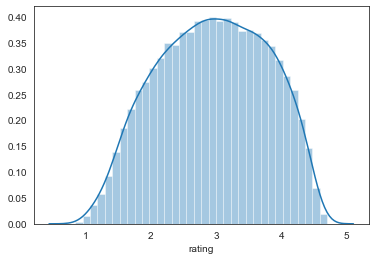

In [7]:
sns.distplot(data['rating'])

Number of shows vs Number of votes

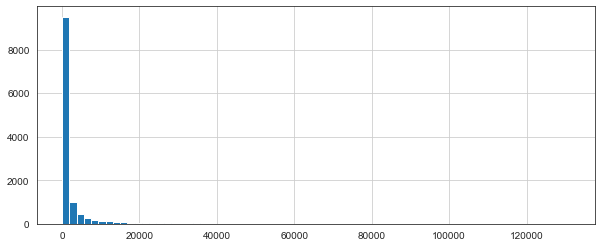

In [8]:
plt.figure(figsize=(10,4))
data['votes'].hist(bins=70)

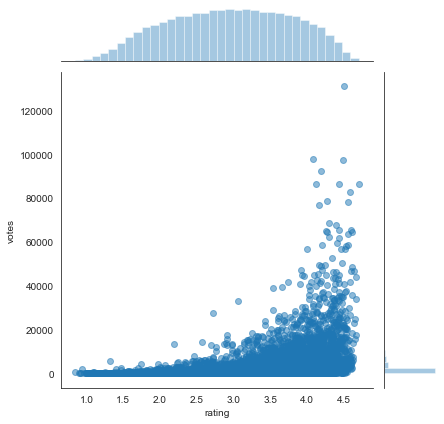

In [9]:
sns.jointplot(x='rating',y='votes',data=data,alpha=0.5)

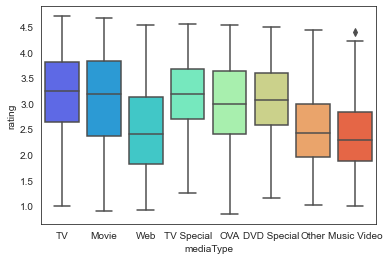

In [10]:
sns.boxplot(x="mediaType", y="rating", data=data,palette='rainbow')

The cells below contain the code for the recommendation system.

Initial setup:

Add Weighted Rating

In [11]:
C = data['rating'].mean()
#remove data with less than 100 votes
m = data['votes'].quantile(0.40)
data_limited = data.copy().loc[data['votes'] >= m]

In [12]:
def weighted_rating(x, m=m, C=C):
    v = x['votes']
    R = x['rating']
    return (v/(v+m) * R) + (m / (m+v) * C)

In [13]:
data_limited['score'] = data_limited.apply(weighted_rating, axis=1)

In [14]:
#rename columnms to match displayed checkbox names
mapping={
    "title": "Title", 
    "mediaType": "Media Type",
    "eps": "Episodes",
    "ongoing": "Ongoing",
    "startYr": "Start Year",
    "finishYr": "End Year",
    "sznOfRelease": "Release Season",
    "description": "Description",
    "studios": "Studios",
    "tags": "Tags",
    "rating": "Rating",
    "votes": "Number of Votes"
}

data_limited = data_limited.rename(columns=mapping)

Recommendation main function:

In [15]:
def perform_recommendation(title):
    #Todo add comments
    
    if len(get_features()) < 2:
        print('Please select at least two tags')
        return
    
    if isinstance(data_limited['Title'][0], str):
        if 'title_raw' not in data_limited.columns:
            data_limited['title_raw'] = data_limited['Title'].copy()
        data_limited['Title'] = data_limited.apply(clean_title, axis=1)
    
    clean_data()  
    
    data_limited['keywords'] = data_limited.apply(update_keywords, axis=1)
    
    cosine_sim = get_cosine_sim()
    
    recs = get_recommendations(title, cosine_sim)

    if recs is not None:
        display_recs(recs)

In [16]:
def clean_data():
    for col in data_limited.columns:
        if col == 'Title' or col == 'title_raw':
            continue
        
        if not isinstance(data_limited[col][0], str):
            data_limited[col] = data_limited[col].astype(str)
            data_limited[col] = data_limited[col].str[0:].str.split(' ').tolist()
            
        if isinstance(data_limited[col][0], str):
            data_limited[col] = data_limited[col].str.replace('\'', '')
            data_limited[col] = data_limited[col].str.replace(',', '')
            data_limited[col] = data_limited[col].str.strip('[')
            data_limited[col] = data_limited[col].str.strip(']')
            data_limited[col] = data_limited[col].str[0:].str.split(' ').tolist()

In [17]:
def clean_title(row):
    row['Title'] = row['Title'].lower()
    row['Title'] = row['Title'].replace(" ", "") 
    
    exclude = set(string.punctuation)
    row['Title'] = ''.join(ch for ch in row['Title'] if ch not in exclude)
    return row['Title']

In [18]:
def update_keywords(row):
    keywords= []
    selected_features = get_features()
    
    for col in selected_features:
        keywords.extend(row[col]) 

    return ' '.join(keywords)


In [19]:
def get_features():
    features = []
    
    for box in checkbox_list:
        if box.value:
            features.append(box.description)
            
    return features

In [20]:
def get_cosine_sim():
    count = CountVectorizer(stop_words='english')
    count_matrix = count.fit_transform(data_limited['keywords'])
    return cosine_similarity(count_matrix, count_matrix)

In [21]:
def get_recommendations(title, cosine_sim):
    if valid_title(title):
        print('Recommendations:')
        
        indices = pd.Series(data_limited.index, index=data_limited['Title'])
        index = indices[title]
        
        similarity_scores = list(enumerate(cosine_sim[index]))
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
        
        similarity_scores = similarity_scores[1:11]
        
        anime_indices = [i[0] for i in similarity_scores]

        return data_limited['title_raw'].iloc[anime_indices]
        
    else:
        print('Title not found. Please try again.')
        print('Tip: Spelling matters, but punctuation and spaces do not.')

In [22]:
def valid_title(title):
    #get input from search field and look through data for a match
    return title in data_limited['Title'].values

In [23]:
def display_recs(recs):
    for rec in recs:
        print(rec)